In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
violations=pd.read_csv('Speed_Camera_Violations.csv')
violations.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,10318 S INDIANAPOLIS,CHI120,05/15/2019,57,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",47.0,21202.0,49.0,705.0,47.0
1,1110 S PULASKI RD,CHI163,05/15/2019,22,1.149841e+06,1.894931e+06,41.867603,-87.725383,"(41.86760272243294, -87.7253827433152)",36.0,21572.0,30.0,98.0,14.0
2,1111 N HUMBOLDT,CHI010,05/15/2019,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11144 S VINCENNES,CHI023,05/15/2019,20,1.166994e+06,1.830711e+06,41.691025,-87.664248,"(41.69102545584918, -87.6642476900556)",33.0,22212.0,74.0,378.0,42.0
4,11153 S VINCENNES,CHI022,05/15/2019,14,1.167029e+06,1.830594e+06,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)",45.0,22212.0,74.0,378.0,22.0


In [4]:
violations.isnull().sum()

ADDRESS                          0
CAMERA ID                        0
VIOLATION DATE                   0
VIOLATIONS                       0
X COORDINATE                  7138
Y COORDINATE                  7138
LATITUDE                      7138
LONGITUDE                     7138
LOCATION                      7138
Historical Wards 2003-2015    7138
Zip Codes                     7138
Community Areas               7138
Census Tracts                 7138
Wards                         7138
dtype: int64

### What is the average number of citations issued per day per camera?

In [5]:
violations.describe()

,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
count,187561.000000,1.804230e+05,1.804230e+05,180423.000000,180423.000000,180423.000000,180423.000000,180423.000000,180423.000000,180423.000000
mean,28.128385,1.159633e+06,1.893454e+06,41.863339,-87.689520,25.723611,19553.310271,37.877588,385.512540,27.490043
std,35.823642,1.576659e+04,3.209159e+04,0.088250,0.057360,14.822820,5247.340942,20.637538,257.959704,14.767911
min,1.000000,1.121638e+06,1.820629e+06,41.663174,-87.828317,1.000000,4299.000000,6.000000,2.000000,1.000000
25%,6.000000,1.149739e+06,1.868078e+06,41.793493,-87.725383,13.000000,21184.000000,20.000000,131.000000,16.000000
50%,15.000000,1.159169e+06,1.898488e+06,41.877243,-87.689803,25.000000,21572.000000,31.000000,372.000000,27.000000
75%,36.000000,1.167170e+06,1.920968e+06,41.939040,-87.662810,37.000000,22248.000000,59.000000,661.000000,40.000000
max,479.000000,1.203645e+06,1.943342e+06,42.000260,-87.529848,53.000000,22620.000000,76.000000,801.000000,50.000000


In [6]:
mean_violations = violations[['VIOLATIONS']].mean()
print('Average of %4.2f citations per day per camera'%(mean_violations))

Average of 28.13 citations per day per camera


### On which day of the week are the most citations issued?

In [7]:
violations['VIOLATION DATE']=pd.to_datetime(violations['VIOLATION DATE'])
violations['weekday']=violations['VIOLATION DATE'].dt.day_name()
violations.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,weekday
0,10318 S INDIANAPOLIS,CHI120,2019-05-15,57,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)",47.0,21202.0,49.0,705.0,47.0,Wednesday
1,1110 S PULASKI RD,CHI163,2019-05-15,22,1.149841e+06,1.894931e+06,41.867603,-87.725383,"(41.86760272243294, -87.7253827433152)",36.0,21572.0,30.0,98.0,14.0,Wednesday
2,1111 N HUMBOLDT,CHI010,2019-05-15,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
3,11144 S VINCENNES,CHI023,2019-05-15,20,1.166994e+06,1.830711e+06,41.691025,-87.664248,"(41.69102545584918, -87.6642476900556)",33.0,22212.0,74.0,378.0,42.0,Wednesday
4,11153 S VINCENNES,CHI022,2019-05-15,14,1.167029e+06,1.830594e+06,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)",45.0,22212.0,74.0,378.0,22.0,Wednesday


In [8]:
day_count=violations.groupby('weekday').VIOLATIONS.count().reset_index()
day_count

,weekday,VIOLATIONS
0,Friday,29331
1,Monday,29473
2,Saturday,18557
3,Sunday,18544
4,Thursday,30150
5,Tuesday,31144
6,Wednesday,30362


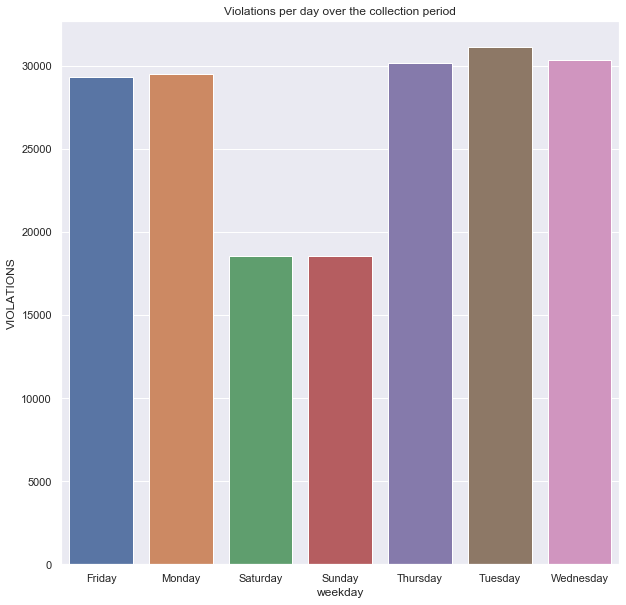

In [9]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=day_count, x="weekday", y="VIOLATIONS")
plt.title('Violations per day over the collection period')
plt.show()

#### Most citations are issued on Tuesdays

### Have the number of active cameras increased or decreased over the collection period?

In [10]:
violations['year']=violations['VIOLATION DATE'].dt.year
active_cameras=violations.groupby(['year', 'CAMERA ID'])['VIOLATIONS'].count().reset_index()
active_cameras.head()

,year,CAMERA ID,VIOLATIONS
0,2014,CHI003,184
1,2014,CHI004,183
2,2014,CHI005,183
3,2014,CHI007,141
4,2014,CHI008,184


In [11]:
a=active_cameras.groupby('year')['CAMERA ID'].count().reset_index()
a.rename(columns={'CAMERA ID': '# of cameras'},inplace=True)
a

,year,# of cameras
0,2014,143
1,2015,150
2,2016,150
3,2017,150
4,2018,162
5,2019,161


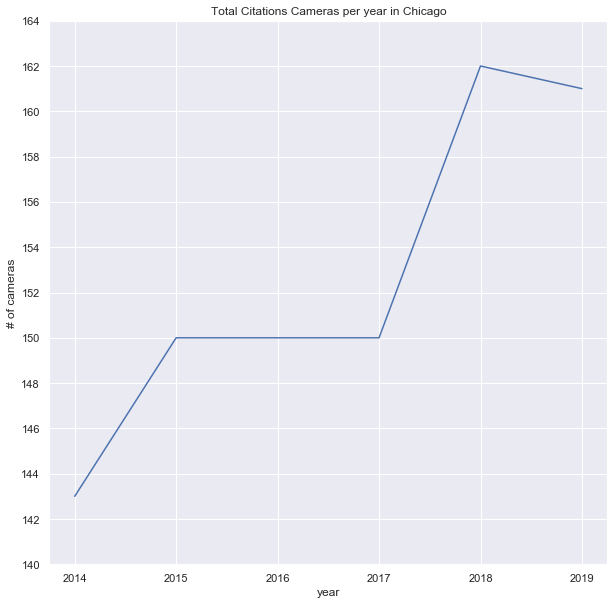

In [12]:
sns.lineplot(data=a, x='year', y='# of cameras')
ax = plt.subplot()
ax.set_yticks(range(140,165, 2))
plt.title('Total Citations Cameras per year in Chicago')
plt.show()

#### The number of citation cameras have increased over the collection period

### Are there any interesting patterns or specific outliers you find in the data?

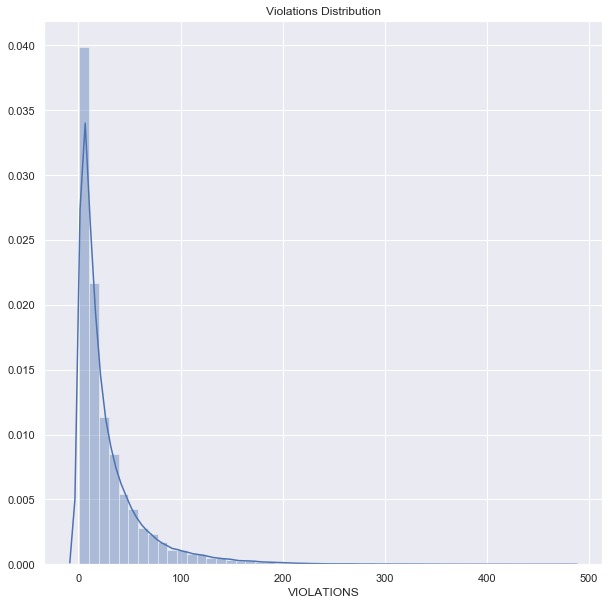

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(violations['VIOLATIONS'])
plt.title('Violations Distribution')
plt.show()

In [14]:
violations['Frequent'] = violations.apply(lambda row: 1   
                if row['VIOLATIONS'] > 400    
                else 0,      axis=1 )
features=violations[['ADDRESS','CAMERA ID','VIOLATIONS', 'Frequent']]

features.head()

,ADDRESS,CAMERA ID,VIOLATIONS,Frequent
0,10318 S INDIANAPOLIS,CHI120,57,0
1,1110 S PULASKI RD,CHI163,22,0
2,1111 N HUMBOLDT,CHI010,55,0
3,11144 S VINCENNES,CHI023,20,0
4,11153 S VINCENNES,CHI022,14,0


In [15]:
print('There are %2.0f violations numbering over 400' % features['Frequent'].sum())

There are 13 violations numbering over 400


In [16]:
features.groupby(['Frequent', 'CAMERA ID']).VIOLATIONS.count().sort_values().reset_index()

,Frequent,CAMERA ID,VIOLATIONS
0,1,CHI149,13
1,0,CHI179,104
2,0,CHI182,119
3,0,CHI178,119
4,0,CHI183,120
5,0,CHI180,127
6,0,CHI181,128
7,0,CHI184,128
8,0,CHI131,178
9,0,CHI173,227


####  The most violations >400 occur at camera (CHI149)

In [17]:
ward_violations=violations.groupby(['Wards']).VIOLATIONS.count().sort_values().reset_index()
ward_violations

,Wards,VIOLATIONS
0,33.0,383
1,15.0,545
2,22.0,877
3,17.0,1139
4,11.0,1634
5,29.0,1636
6,32.0,1696
7,48.0,1699
8,41.0,1724
9,16.0,1728


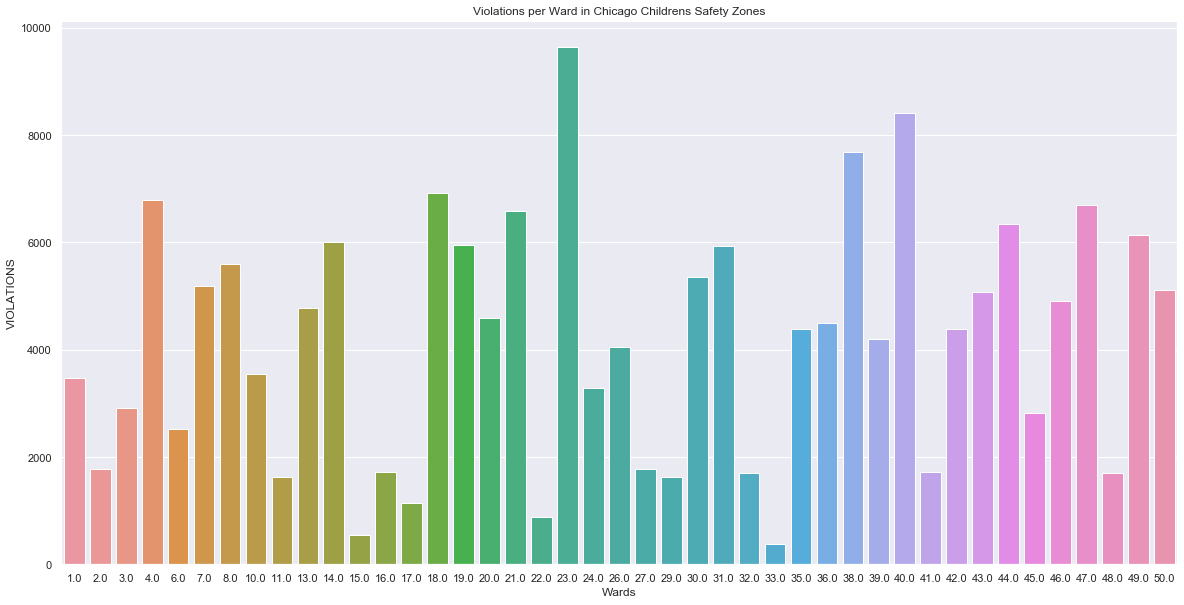

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=ward_violations, x= 'Wards' ,y='VIOLATIONS')
plt.title('Violations per Ward in Chicago Childrens Safety Zones')
plt.show()

#### Most violations occur in Ward 23 and the least in Ward 33